This notebook can be run on mybinder:  [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fai-courses%2Fautonomous_systems_ml/HEAD?filepath=notebooks%2F2_knn)

# [Iris Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set) Example

The data set consists of $n=150$ samples from each of three species of Iris ([Iris setosa](https://en.wikipedia.org/wiki/Iris_setosa), [Iris virginica](https://en.wikipedia.org/wiki/Iris_virginica) and [Iris versicolor](https://en.wikipedia.org/wiki/Iris_versicolor),  $50$ samples from each of these three species). Four <a href="Feature_(machine_learning)">features</a>, i.e. $p=4$, were measured from each sample: the length and the width of the [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal), in centimetres. Based on the combination of these four features, a classification task is to distinguish the species from each other.


## Loading data
Several conventional data set, such as the well known *Iris* data set. are included in the Sickit-learn toolbox. The first axis (lines) is the samples and the second axis is the features.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

We have 150 samples with 4 features. We can plot the data for some pairs of features.

Text(0, 0.5, 'petal width (cm)')

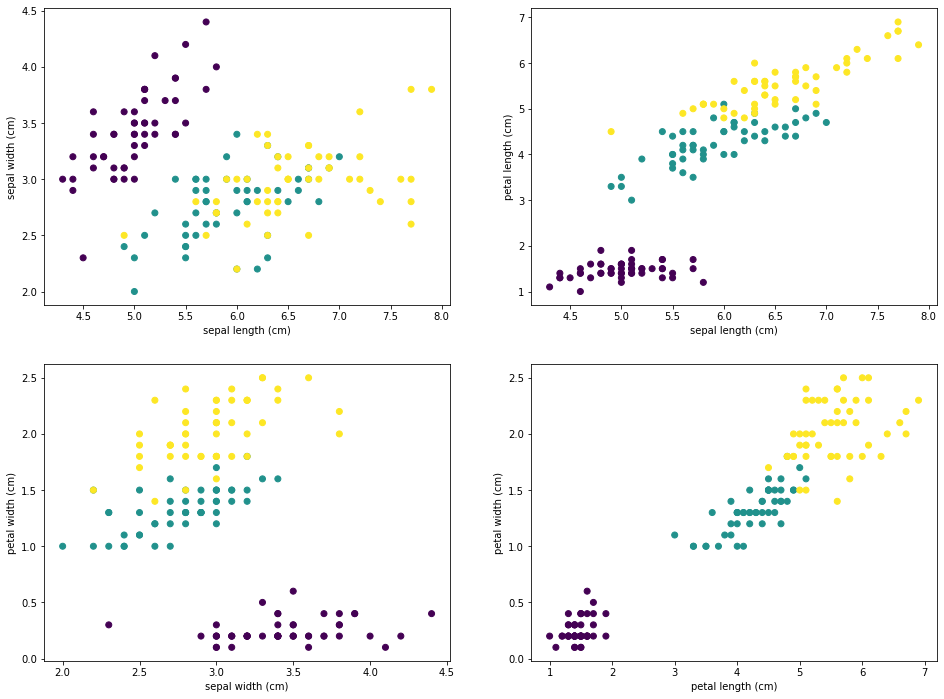

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
f,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(16, 12))
# Axe 1 and 2
ax1.scatter(data[:,0], data[:,1],c=iris.target,)
ax1.set_xlabel(iris.feature_names[0])
ax1.set_ylabel(iris.feature_names[1])

# Axe 1 and 3
ax2.scatter(data[:,0], data[:,2],c=iris.target,)
ax2.set_xlabel(iris.feature_names[0])
ax2.set_ylabel(iris.feature_names[2])

# Axe 2 and 4
ax3.scatter(data[:,1], data[:,3],c=iris.target,)
ax3.set_xlabel(iris.feature_names[1])
ax3.set_ylabel(iris.feature_names[3])

# Axe 3 and 4
ax4.scatter(data[:,2], data[:,3],c=iris.target,)
ax4.set_xlabel(iris.feature_names[2])
ax4.set_ylabel(iris.feature_names[3])

## Supervised learning

The problem is to learn a function linking the observation (here *data*) and the external data (here *target*). With scikit-learn, we need to select one alorithm then apply the *fit* method and the *predict* method. Using a K-Nearest Neighbors classifiers, it reduces to

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # Creation of the classifier
knn.fit(iris.data, iris.target) # Model fitting
y_predict = knn.predict(iris.data) # Prediction

print(y_predict[::10])
print(iris.target[::10])

[0 0 0 0 0 1 1 2 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


Ok, easy. But in practice we never do that: we should fit and predict with different samples! In fact, we have seen that training error is a (sometimes very) optimistically biased estimation of the true error rate of our algorithm. We need to split the data set into a training set and a validation set. Hopefully, scikit-learn provides a set of tools to manipulate the data. Furthermore, since the *fit* and the *predict* function are always the same whatever the algorithm, benchmarking using scikit-learn is super easy.

Here we are comparing several standard classifiers (note that, at this time, we apply them as 'black boxes', but we will see the details later in the course) using the universal functions `fit` and `predict` provided by scikit-learn

In [6]:
from sklearn import linear_model, svm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import scipy as sp
import numpy as np
from sklearn.metrics import accuracy_score # accuracy = rate of correct classification

# Init classifier
classifiers = [LinearDiscriminantAnalysis(solver="lsqr"), QuadraticDiscriminantAnalysis(),
               linear_model.LogisticRegression(solver='lbfgs',multi_class='multinomial'),svm.SVC(kernel='linear'), KNeighborsClassifier()]
names = ["LDA", "QDA", "Logistic Regression", "Support Vector Machines", "K Nearest Neighbors"]

# Split data -> 1/2 for learning & 1/2 for validation
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=1)

for clf,name in zip(classifiers,names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) # predict the label of X_test from X_train and y_train
    mcr_error = 1-accuracy_score(y_test, y_pred) # Compute the overall misclassification rate
    print('Errors for {1}: \t {0:.2f}'.format(mcr_error,name)) # \t means "tabular" space, and {0:.2f} 
                                                           # means we print only two first decimal

Errors for LDA: 	 0.01
Errors for QDA: 	 0.01
Errors for Logistic Regression: 	 0.03
Errors for Support Vector Machines: 	 0.00
Errors for K Nearest Neighbors: 	 0.05


## Model complexity
Each algorithm has a set of hyperparameters that needs to be optimized for the considered data set. This issue will be addressed later. Here, we just illustrate the fact that they could have a great influence on the final decision.

For the KNN, the number of neighbors considered for the decision is the main hyperparemeter to set-up for small to medium size problem. Default value for scikit-learn is set to 5 (do knn? for help). In the following we are going to plot the overall misclassication rate function of the hyperparameter.

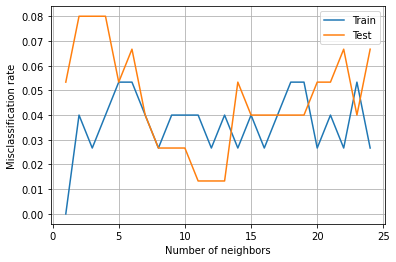

In [7]:
neighbors = np.arange(1,25)
errors_train, errors_validation = [], []
for n_ in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_train)
    errors_train.append(1-accuracy_score(y_train, y_pred))
    
    y_pred = knn.predict(X_test)
    errors_validation.append(1-accuracy_score(y_test, y_pred))
    
plt.plot(neighbors,errors_train)
plt.plot(neighbors,errors_validation)
plt.legend(["Train", "Test"])
plt.xlabel("Number of neighbors")
plt.ylabel("Misclassification rate")
plt.grid()

### Exercice
- What is the (estimated) optimal value for the knn parameter?
- What is the optimal error rate?
- Replace the defaut euclidean metric used to determine the nearest neighbors by ["chebyshev" one](https://en.wikipedia.org/wiki/Chebyshev_distance) and compare your results (*hint:* see the parameter `metric` of [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).
- What happens when we change the test and train sets (e.g., try on several runs by changing the `random_state` seed)? 
- How confident are you on these best scores/hyperparameter values?

We will see later how to apply more efficient procedures to assess the model performances or to tune the hyperparameters